This is a Linear regression model to predict Red_Wine quality based certain chemical factors. All data used to train the model is sourced from https://archive.ics.uci.edu/ml/datasets/wine+quality

Citation:-
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The attributes of the dataset are-
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file_path='winequality-red.csv'
wine_data=pd.read_csv(file_path,sep = ';')   #delimeter in the data is a semicolon, so seperating with semicolon using 'sep'
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


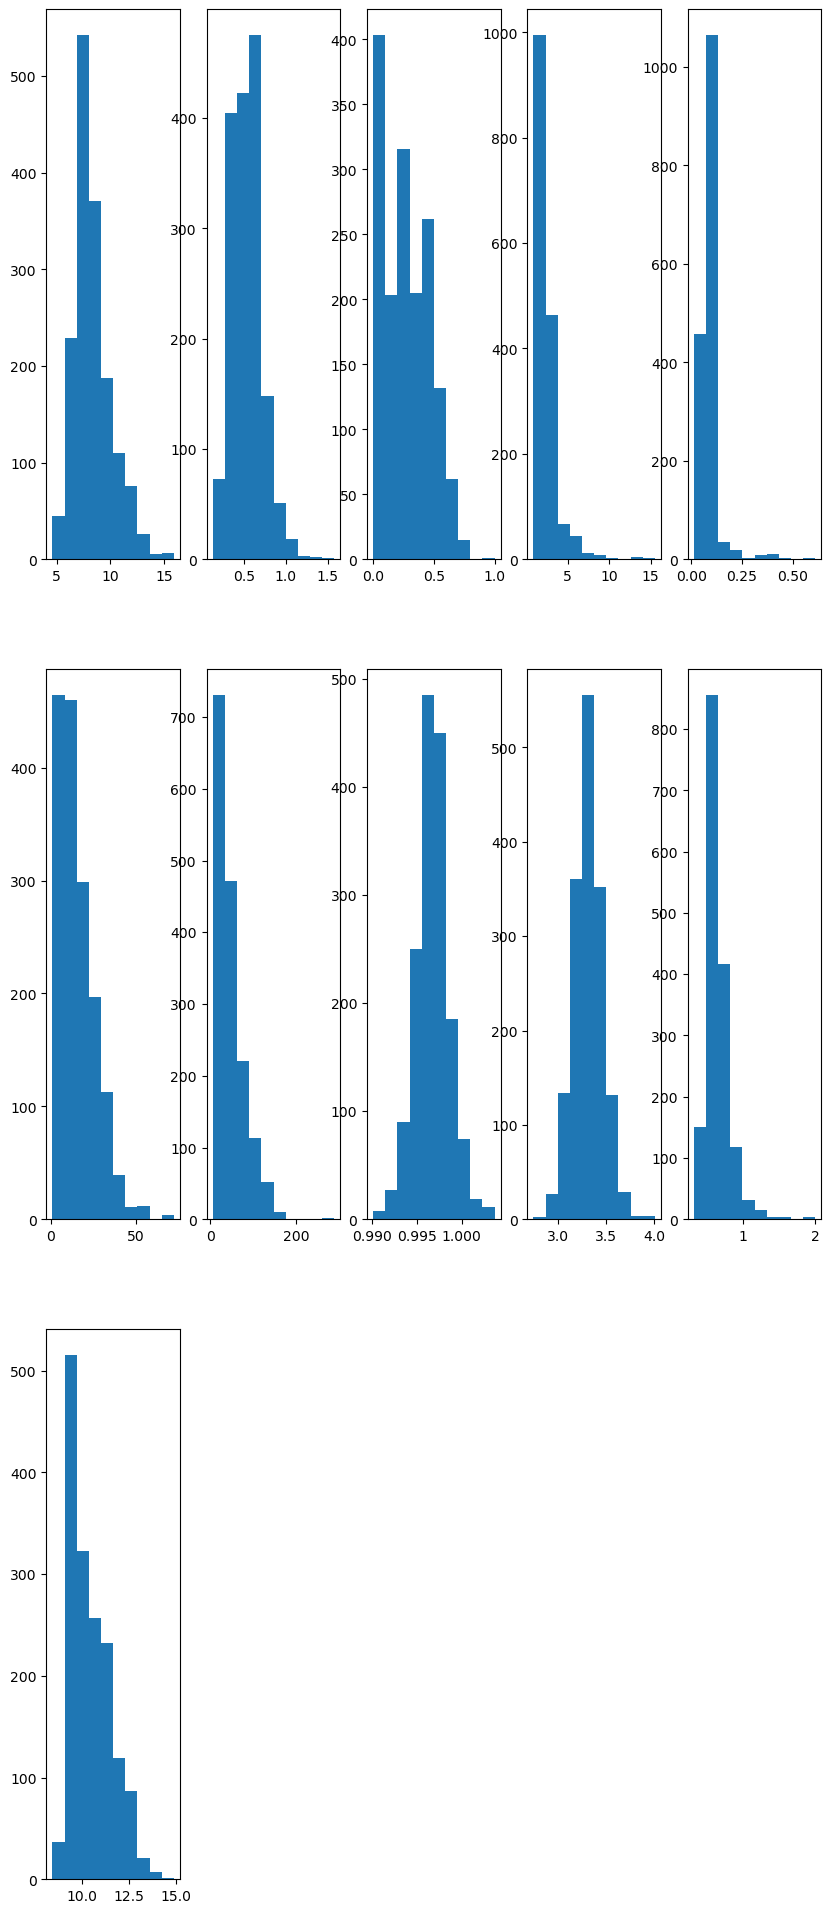

In [4]:
y=wine_data.quality
X=wine_data.drop(['quality'],axis=1)
i=0
fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(10)
for column_name in X:
    i+=1
    plt.subplot(6,5,i)
    plt.hist(X[column_name])


StandardScaler()
[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


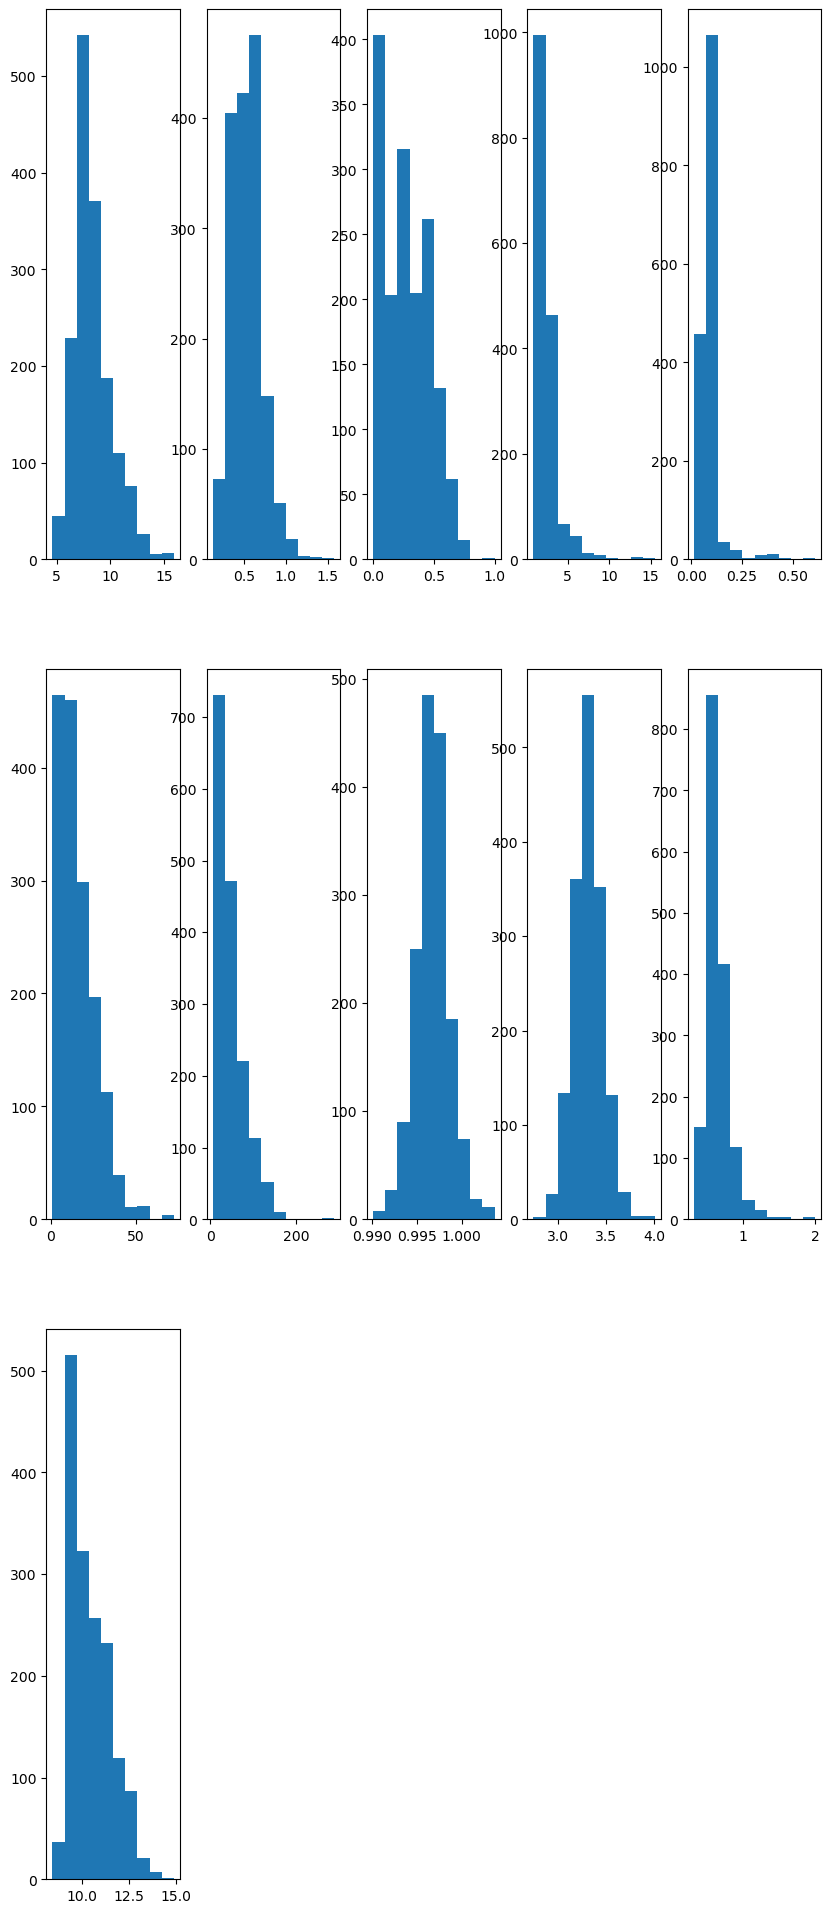

In [5]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
print(scaler.fit(X))
print(scaler.transform(X))
i=0
fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(10)
for column_name in X:
    i+=1
    plt.subplot(6,5,i)
    plt.hist(X[column_name])
X.describe()

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.337373,0.530000,0.272181,2.553167,0.087024,16.032838,47.114152,0.996757,3.309828,0.659077,10.413995
std,1.734938,0.182544,0.195608,1.452549,0.047801,10.520943,33.584207,0.001882,0.153968,0.174846,1.061308
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995620,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996760,3.310000,0.620000,10.200000
75%,9.300000,0.637500,0.420000,2.600000,0.090000,21.000000,63.000000,0.997855,3.400000,0.730000,11.083333
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500)
model.fit(X_train,y_train)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
from sklearn.metrics import mean_absolute_error
prdns=model.predict(X_valid)
err=mean_absolute_error(y_valid,prdns)
err

0.4056875

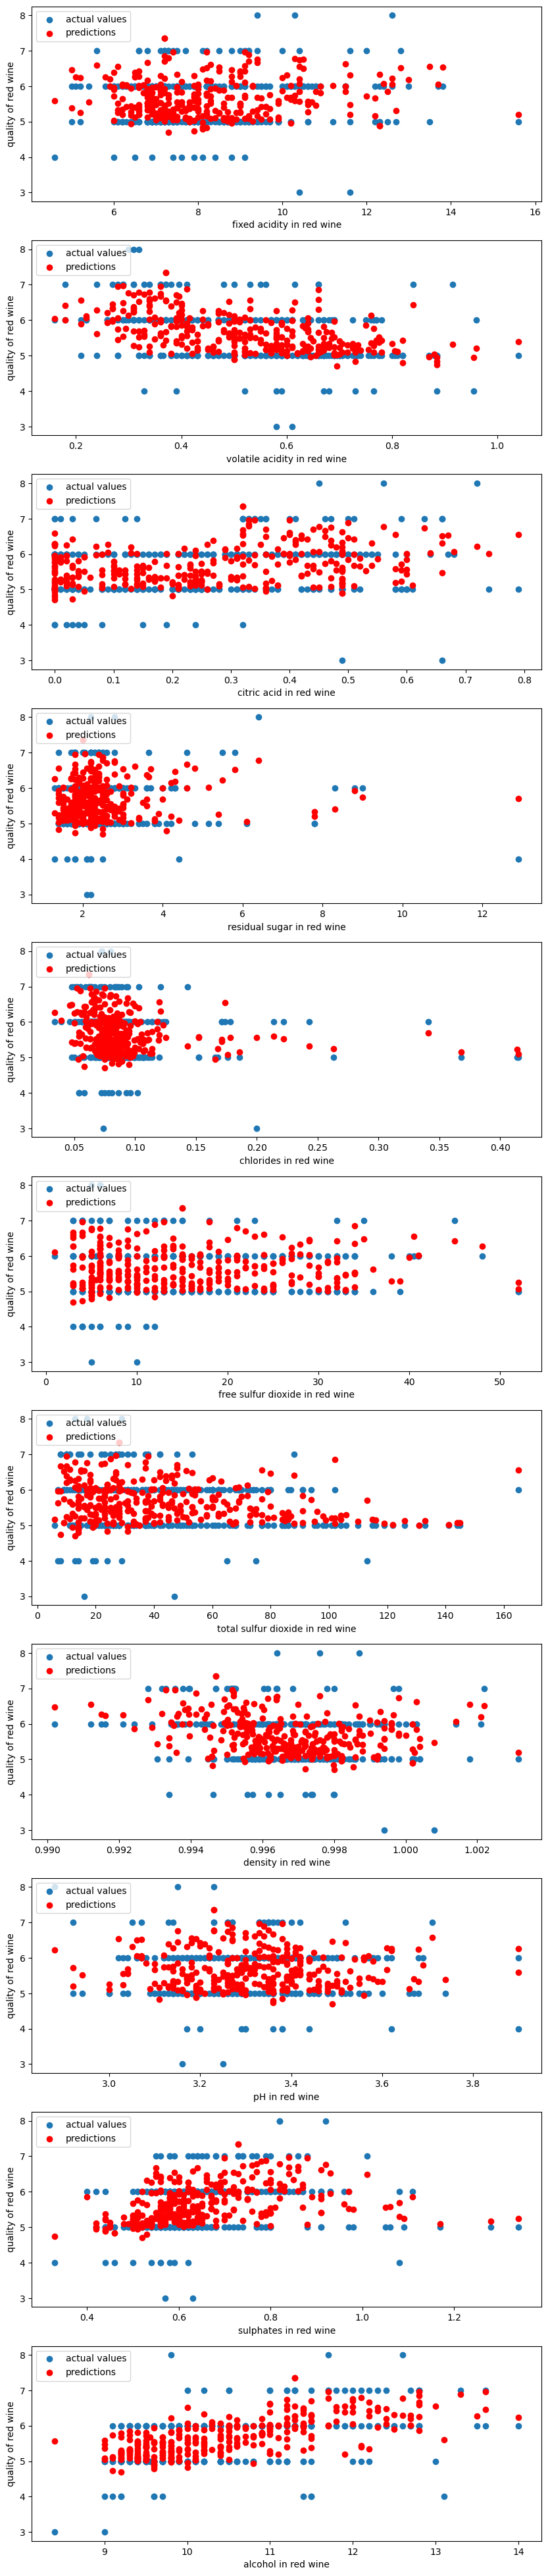

In [9]:
import matplotlib.pyplot as plt
i=0
fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(10)
for column_name in X_valid:
    i+=1
    plt.subplot(11,1,i)
    plt.scatter(X_valid[column_name],y_valid,label='actual values')
    plt.scatter(X_valid[column_name],prdns,c='red',label='predictions')
    plt.xlabel(column_name+' in red wine')
    plt.ylabel('quality of red wine')
    plt.legend(loc="upper left")


<Figure size 1200x600 with 0 Axes>

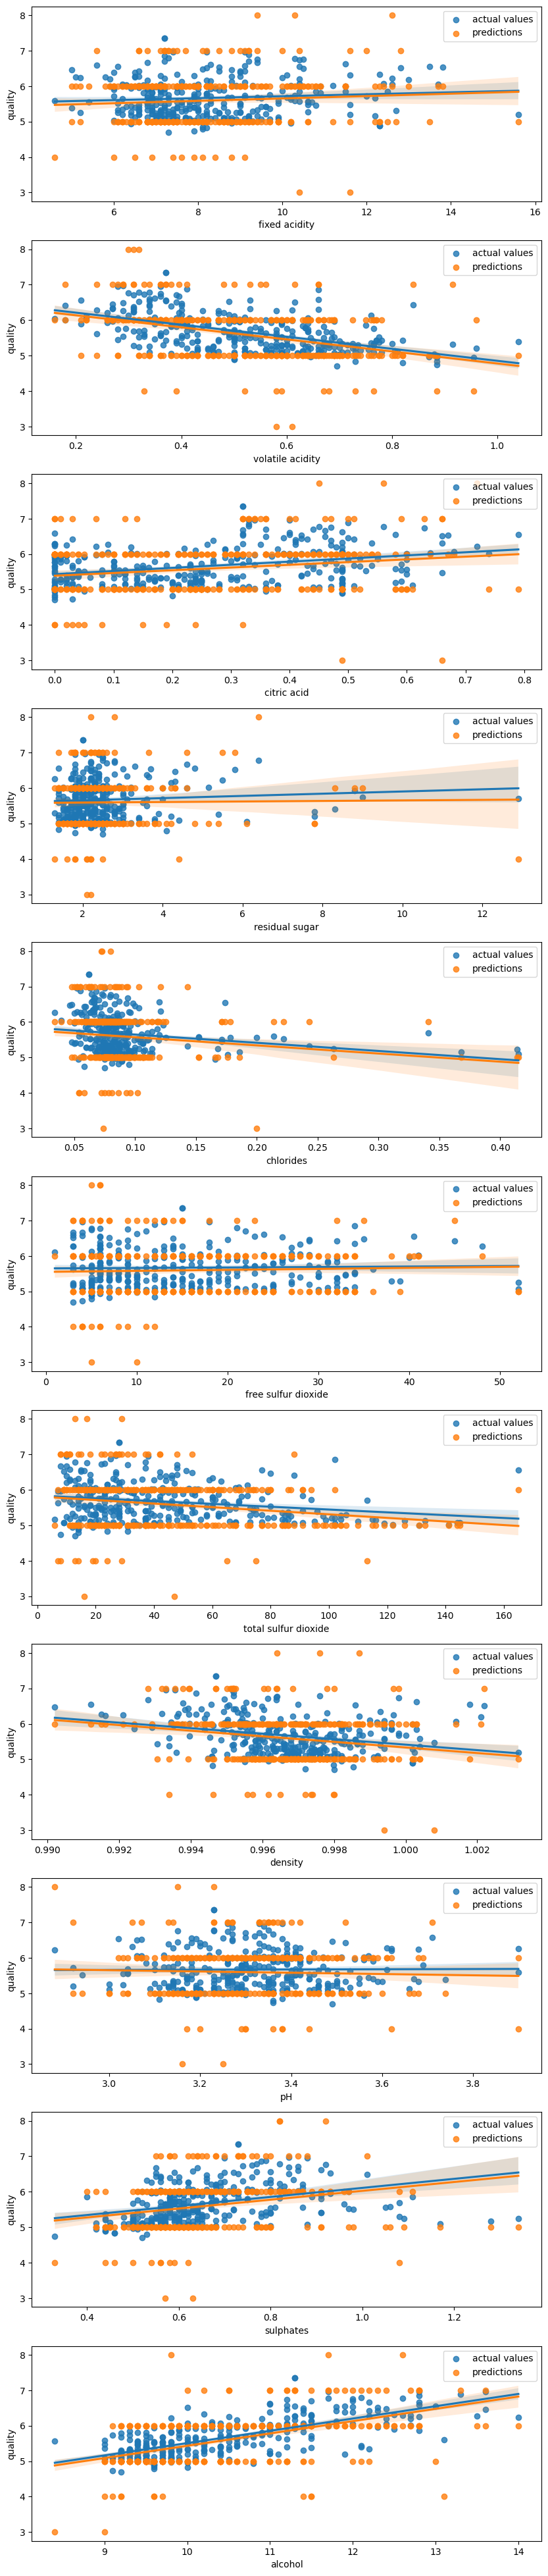

In [18]:
import seaborn as sns
plt.figure(figsize=(12,6))
i=0
fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(10)
for column_name in X_valid:
    i+=1
    plt.subplot(11,1,i)
    sns.regplot(X_valid[column_name],prdns,label='actual values')
    sns.regplot(X_valid[column_name],y_valid,label='predictions')
    plt.legend(loc="upper right")